In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import ppscore as pps
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from os import system
from IPython.display import Image  
from sklearn import tree

In [67]:
data = pd.read_csv('bank-full.csv')
data.shape

# We have 45211 rows and 17 columns

(45211, 17)

In [4]:
data.dtypes
# there are a few object data types and integer data types. 
# We need to convert these object datatypes into categorical or into any suitable data types before processing

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [68]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()
# There are no null entries as seen below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isna().sum()
# clearly there are no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [15]:
for i in data.columns:
    if data[i].dtype=='object':
        print("The unique values of", i, " :\n" , data[i].value_counts(),"\n \n total unique values for ",i,"is " , len(data[i].value_counts()), " \n")

The unique values of job  :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 
 
 total unique values for  job is  12  

The unique values of marital  :
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
 
 total unique values for  marital is  3  

The unique values of education  :
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 
 
 total unique values for  education is  4  

The unique values of default  :
 no     44396
yes      815
Name: default, dtype: int64 
 
 total unique values for  default is  2  

The unique values of housing  :
 yes    25130
no     20081
Name: housing, dtype: int64 
 
 total unique values for  housing is  2  

The unique values of loa

In [23]:
data_i = data.copy()
data_i['Target'] = data_i['Target'].replace({'no':0,'yes':1})
data_i['default'] = data_i['default'].replace({'no':0,'yes':1})
data_i['housing'] = data_i['housing'].replace({'no':0,'yes':1})
data_i['loan'] = data_i['loan'].replace({'no':0,'yes':1})

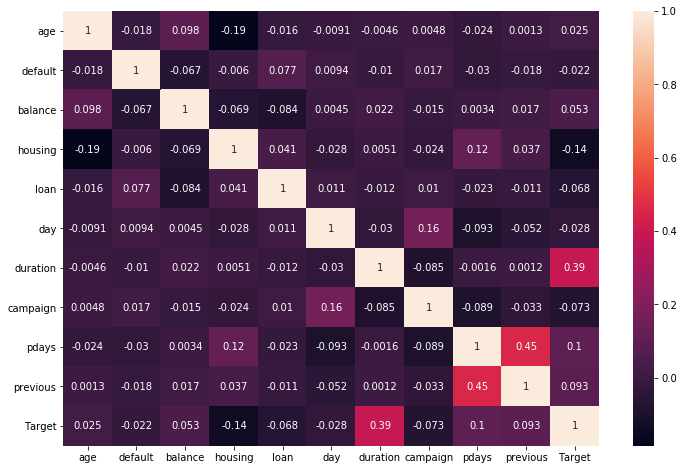

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(data_i.corr(),annot=True)
plt.show()
# There is not much of a correlation between target and other independent variables except for "duration"
# Also, correlation matrix does not give the overall independent data's correlation. 
# hence i am opting to check the predictive power score

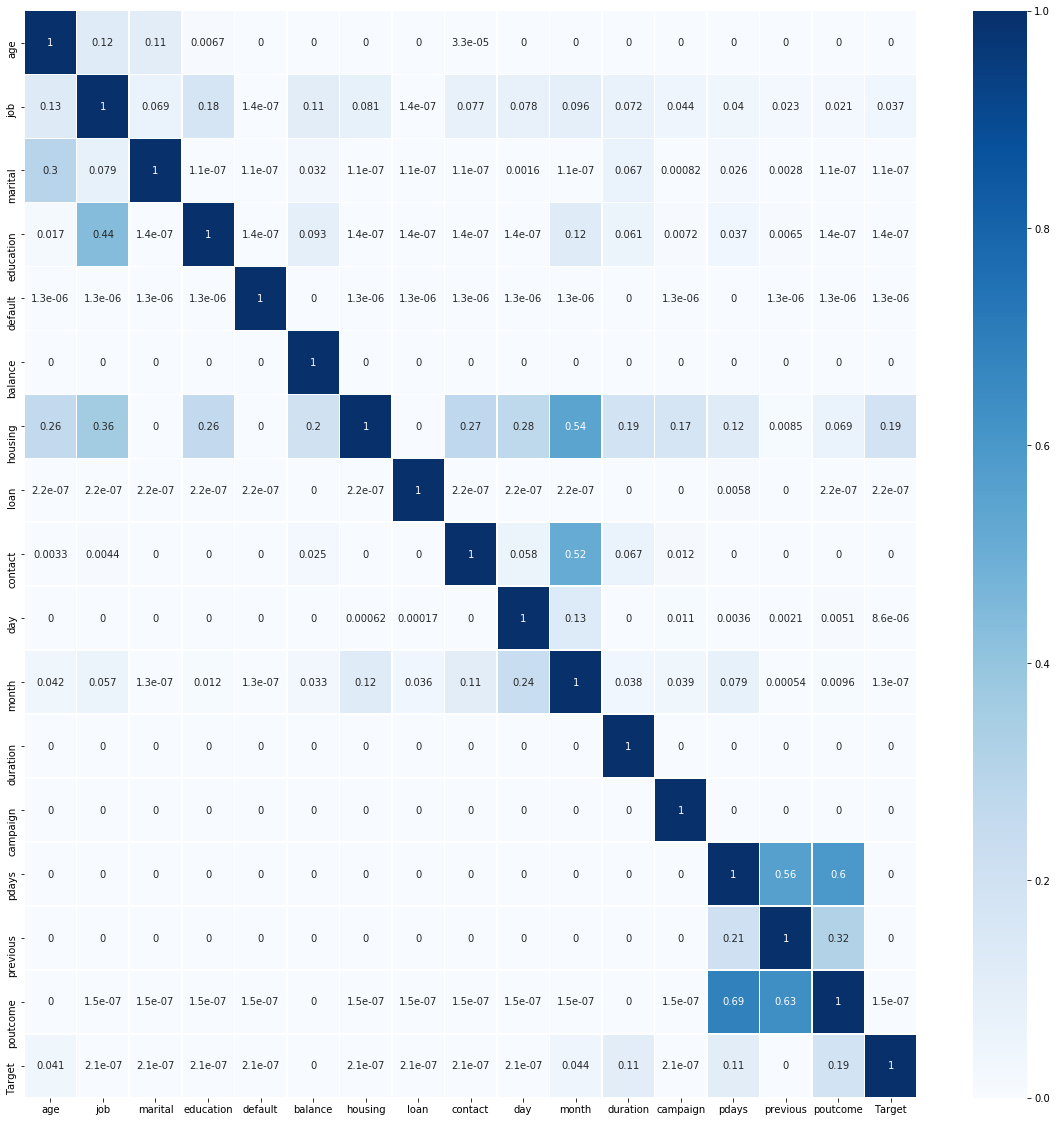

In [39]:
pps.score(data,x='pdays',y='Target')
df_matrix=pps.matrix(data)
plt.figure(figsize=(20,20))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

# From the PPS, it is clear that, no independent variable is a good predictor of 'Target'
# however, 'poutcome' has the highest pps of '0.19' that is so because, 
# the outcome of the previous campaign was somewhat affect on the current campaign

# Job is a good predictor of education

# pdays and poutcome are a good predictor of each other 
# (this because, the no of days passed after the last contact is directly proportional to the poutcome)

# the 'previous' variable is a good predictor of 'poutcome' also

In [44]:
c = ['Skewness']
pd.DataFrame(data.skew(),columns=c).T

# It is clear that balance,duration,campaign,pdays,previous columns are highly skewed

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


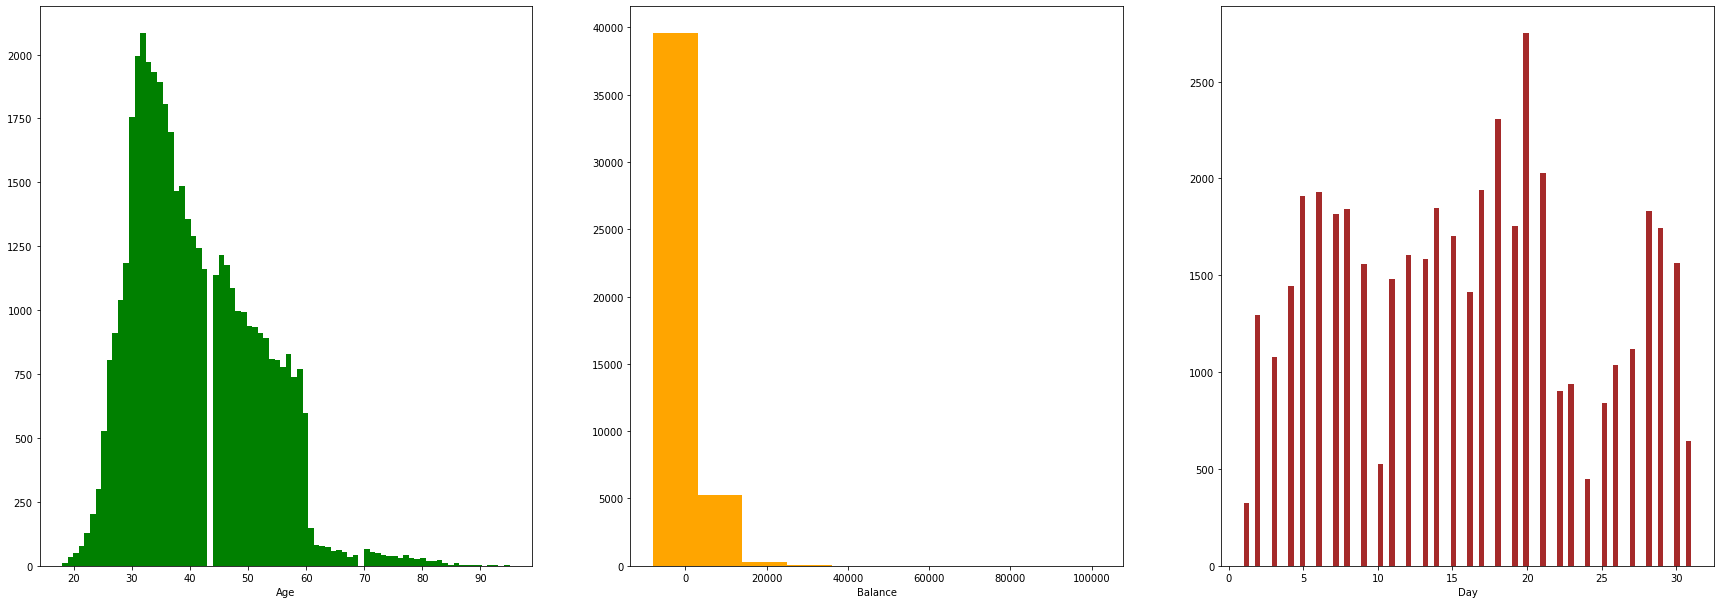

In [41]:
plt.figure(figsize=(30,35))

plt.subplot(3,3,1)
plt.hist(data['age'],color='green',bins=80)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(data['balance'],color='orange')
plt.xlabel('Balance')

plt.subplot(3,3,3)
plt.hist(data['day'],color='brown',bins=80)
plt.xlabel('Day')



plt.show()

# Age is somewhat normally distributed
# Balance is highly skewed to the right
# Day is normally distributed

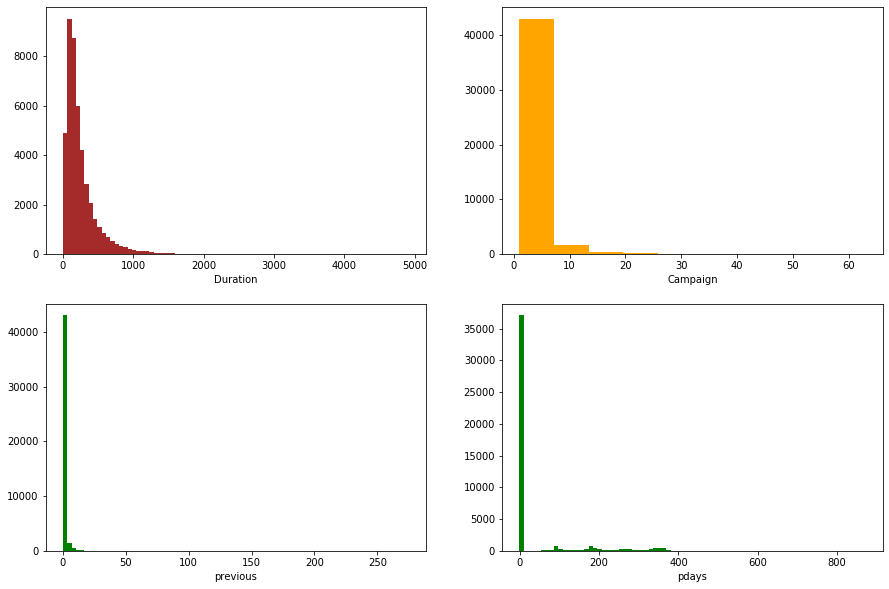

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(data['duration'],color='brown',bins=80)
plt.xlabel('Duration')

plt.subplot(2,2,2)
plt.hist(data['campaign'],color='orange')
plt.xlabel('Campaign')

plt.subplot(2,2,3)
plt.hist(data['previous'],color='green',bins=80)
plt.xlabel('previous')

plt.subplot(2,2,4)
plt.hist(data['pdays'],color='green',bins=80)
plt.xlabel('pdays')

plt.show()

#Duration,Campaign,previous and pday are heavily skewed to the right

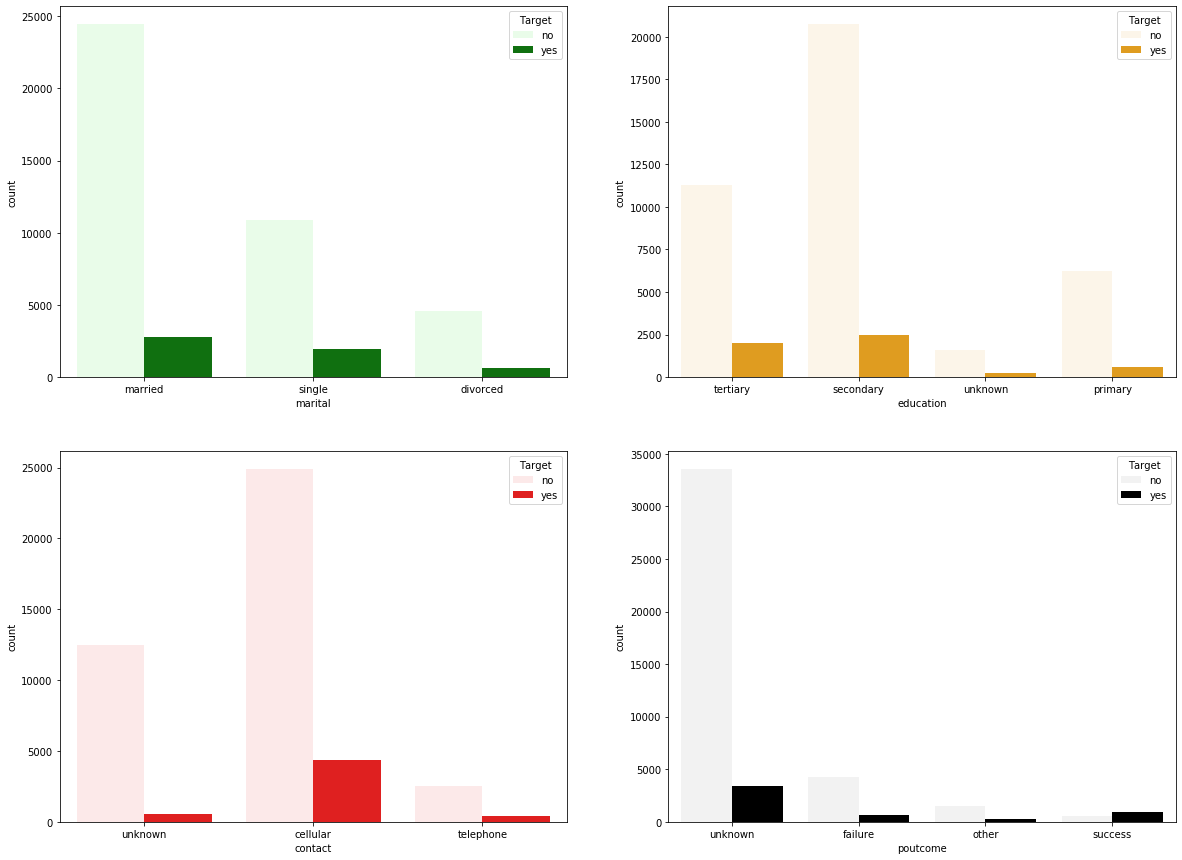

In [43]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(data=data,x='marital',hue='Target',color='green')

plt.subplot(2,2,2)
sns.countplot(data=data,x='education',hue='Target',color='orange')

plt.subplot(2,2,3)
sns.countplot(data=data,x='contact',hue='Target',color='red')

plt.subplot(2,2,4)
sns.countplot(data=data,x='poutcome',hue='Target',color='black')

plt.show()

# 1. married and single customers tend to subscribe the term deposit much higher than divorced customers

# 2. customers from secondary and tertiary education levels tend to contribute more to the term deposit

# 3. customers with cellular communication accept the term deposit subscription much higher than 
# customers with telephone and unknown comunication type

# 4.  customers whose outcome from the previous marketing campaign is unknown have accepted the term deposit much more
# however, this result might be biased because, the ratio of the unknown vs success,other & failure values is highly imbalanced
# also, customers with success outcome from the previous campaign have a higher acceptance rate for the term deposit
# customers with failure outcome from previous outcome have a much lower acceptance rate

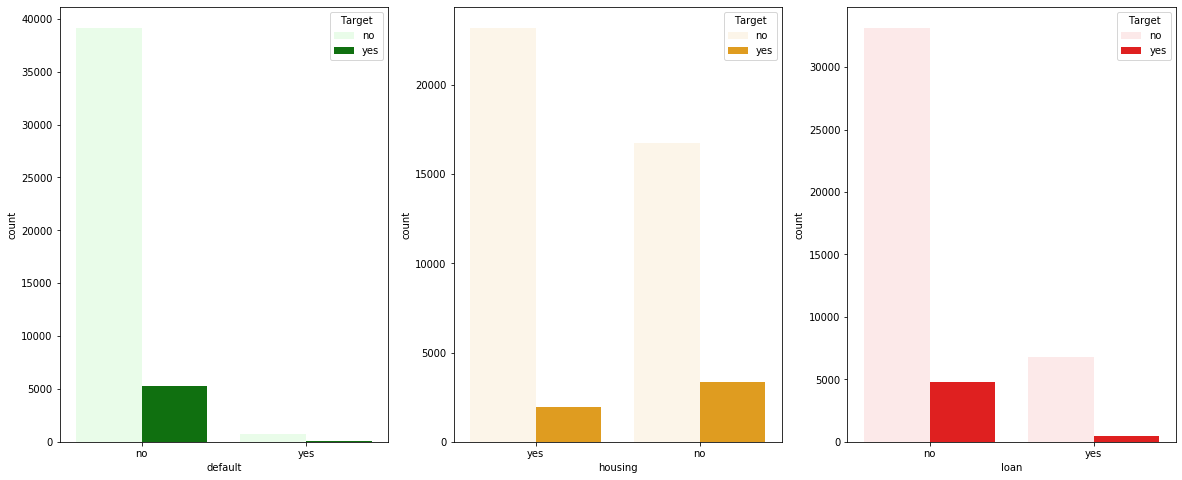

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.countplot(data=data,x='default',hue='Target',color='green')

plt.subplot(1,3,2)
sns.countplot(data=data,x='housing',hue='Target',color='orange')

plt.subplot(1,3,3)
sns.countplot(data=data,x='loan',hue='Target',color='red')
plt.show()

# 1. it is very evident that customers with no credit default accept the term deposit much higher

# 2. customers without housing loan have accepted the have accepted the term deposit muchmore than customers with housing loan

# 3. it is clear having personal loan accept the term deposit subscription much lesser than customers 
# who dont have personal loan

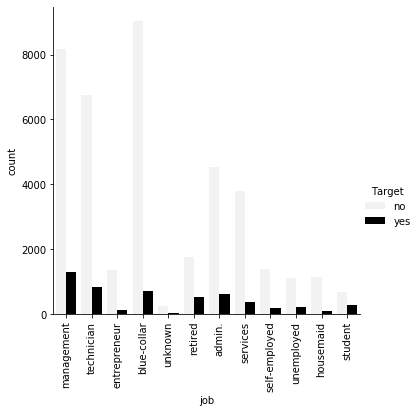

In [46]:
sns.catplot(data=data,x='job',color='black',hue='Target',kind='count').set_xticklabels(rotation=90)

plt.show()


# Custmoers from management,admin,blue-collar and techinician jobs tends to subscribe the term deposit more
# retired customers have also shown intrest in accepting the term deposit subcription

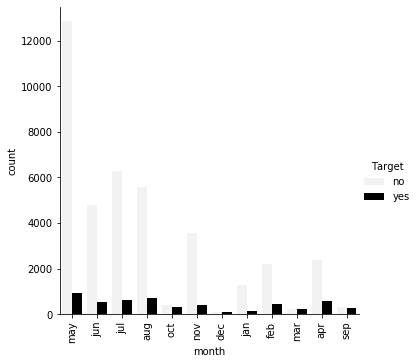

In [47]:
sns.catplot(data=data,x='month',color='black',hue='Target',kind='count').set_xticklabels(rotation=90)
plt.show()

# most of the term deposit acceptance have been happening in the month of april,may,june,july,august
# i.e., april,may,june,july,august months have been the major individual contributors for term deposit acceptance

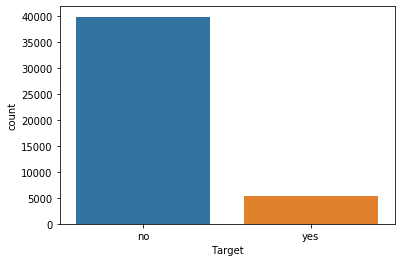

In [48]:
sns.countplot(data=data,x='Target')
plt.show()

# It is pretty evident that the dataset is biased i.e., the percentage of 'no' is much higher than 'yes', there for there 
# is a clear imbalance in the dataset and this may affect our final results producing a biased results

In [108]:
print('The percentage of customers subscribe to the term deposit is {0:.2f} %'.format((len(data[data['Target']=='yes'])/len(data['Target']))*100))
print('The percentage of customers subscribe to the term deposit is {0:.2f} %'.format((len(data[data['Target']=='no'])/len(data['Target']))*100))

The percentage of customers subscribe to the term deposit is 11.70 %
The percentage of customers subscribe to the term deposit is 88.30 %


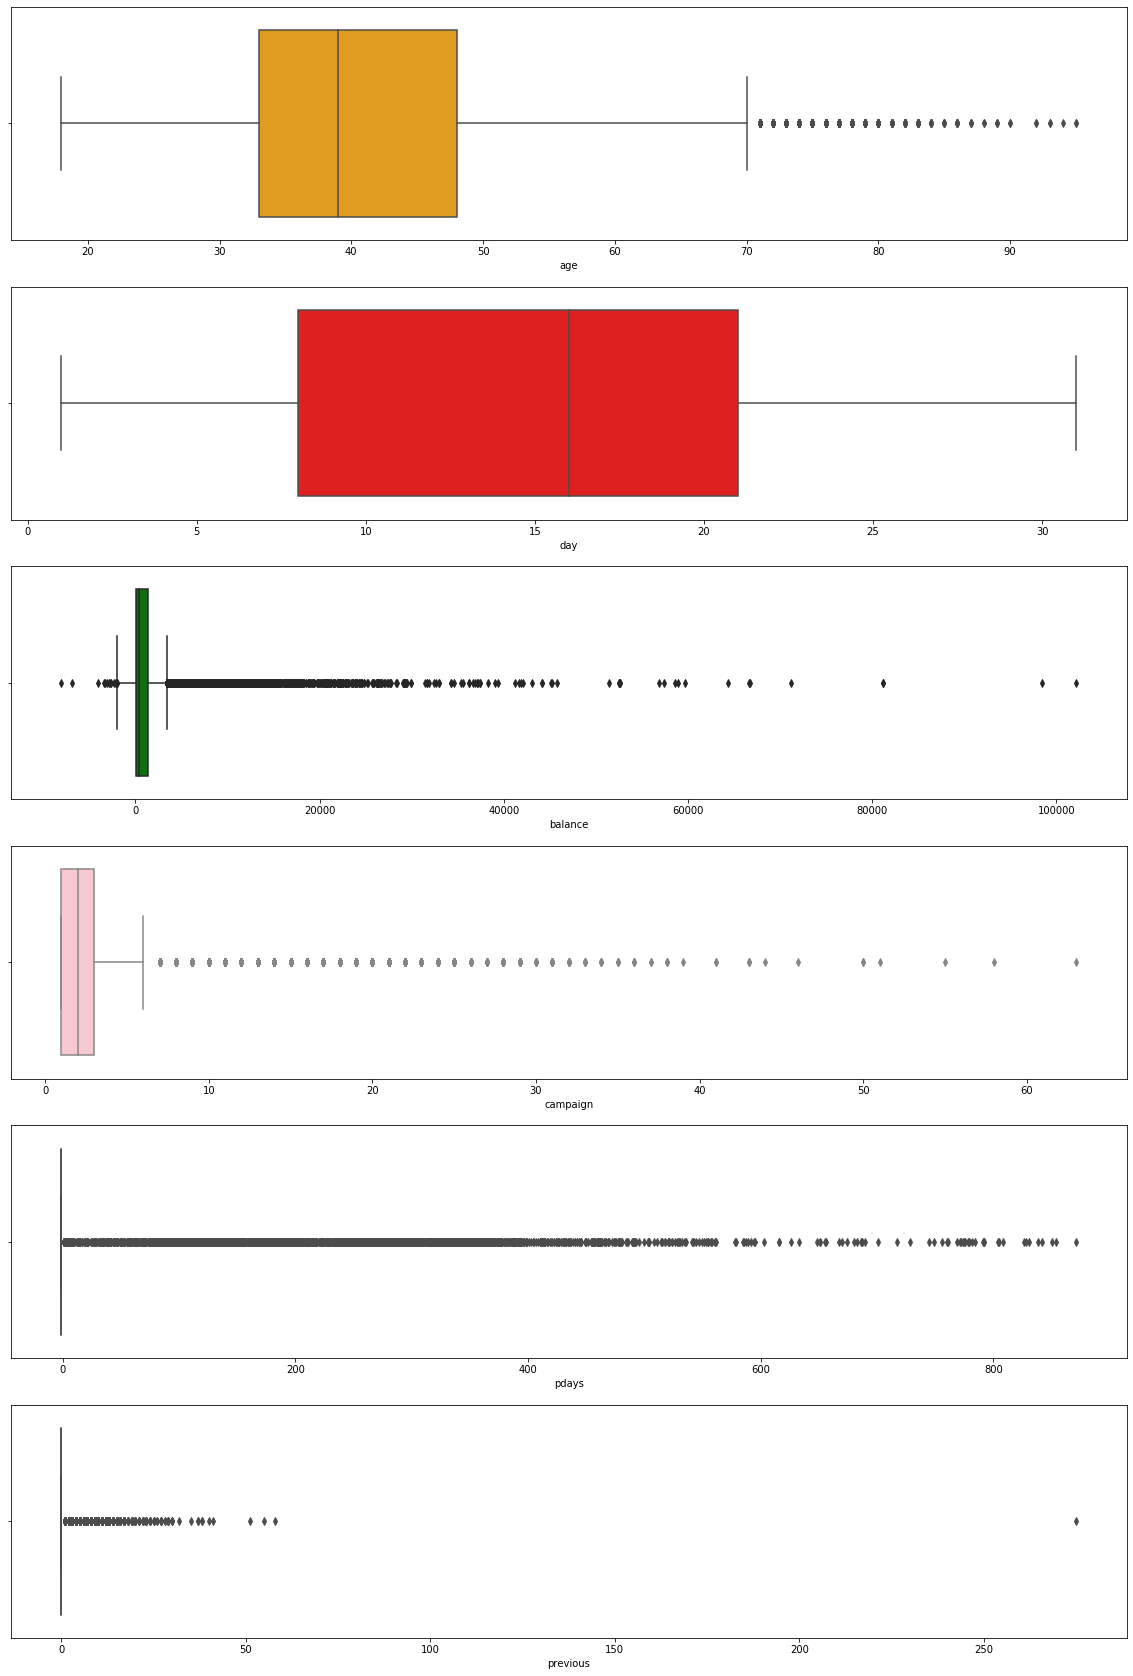

In [49]:

plt.figure(figsize=(20,30))

plt.subplot(6,1,1)
sns.boxplot(data['age'],color='orange')
# plt.xlabel('1. Age')

plt.subplot(6,1,2)
sns.boxplot(data['day'],color='red')
# plt.xlabel('3. Experience')

plt.subplot(6,1,3)
sns.boxplot(data['balance'],color='green')
# plt.xlabel('2. Income')

plt.subplot(6,1,4)
sns.boxplot(data['campaign'],color='pink')
# plt.xlabel('4. CCAvg')

plt.subplot(6,1,5)
sns.boxplot(data['pdays'],color='yellow')
# plt.xlabel('5. Mortgage')

plt.subplot(6,1,6)
sns.boxplot(data['previous'],color='yellow')

plt.show()

# We can see that age has some outliers
# Day is normally distrubuted
# balance and campaign has many outliers
# pdays and previous have plenty of outliers

In [52]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [54]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [55]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


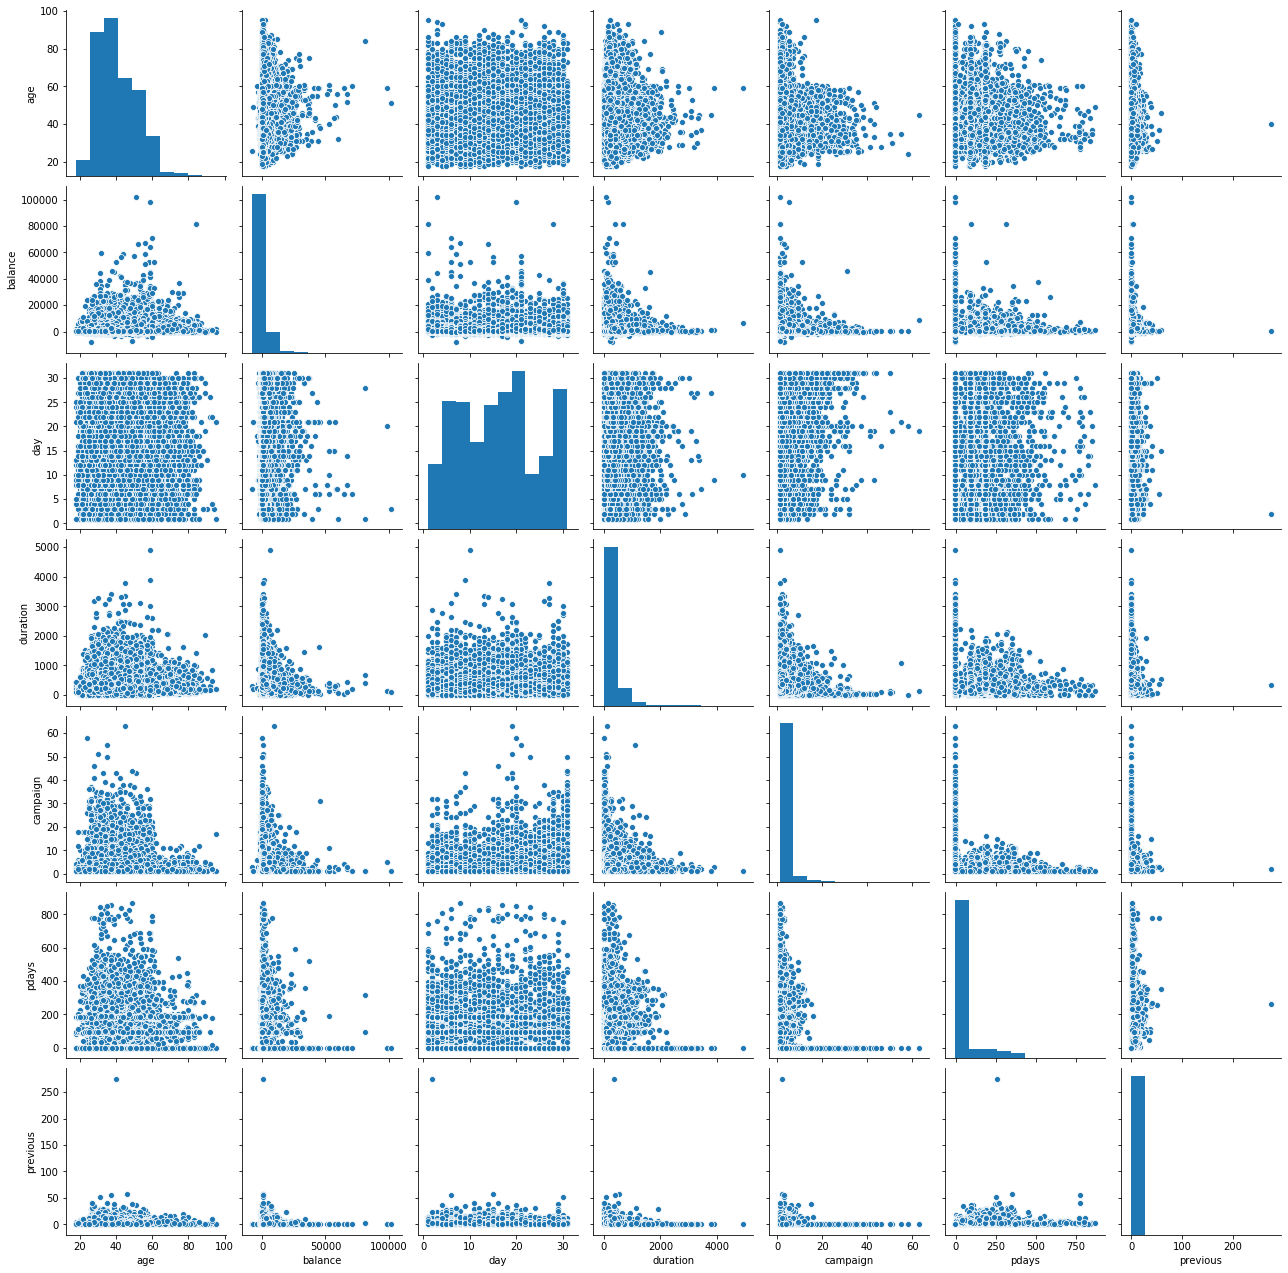

In [56]:
sns.pairplot(data)

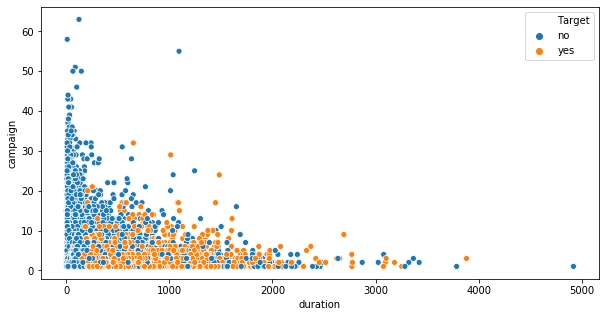

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='duration',y='campaign',data=data,hue='Target')

# it is clear that,as the duration of last call is higher, the higher the acceptance rate
# also, the higher the number of calls made the lower the acceptance, however, if the duration is longer, the tend to accept

In [69]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


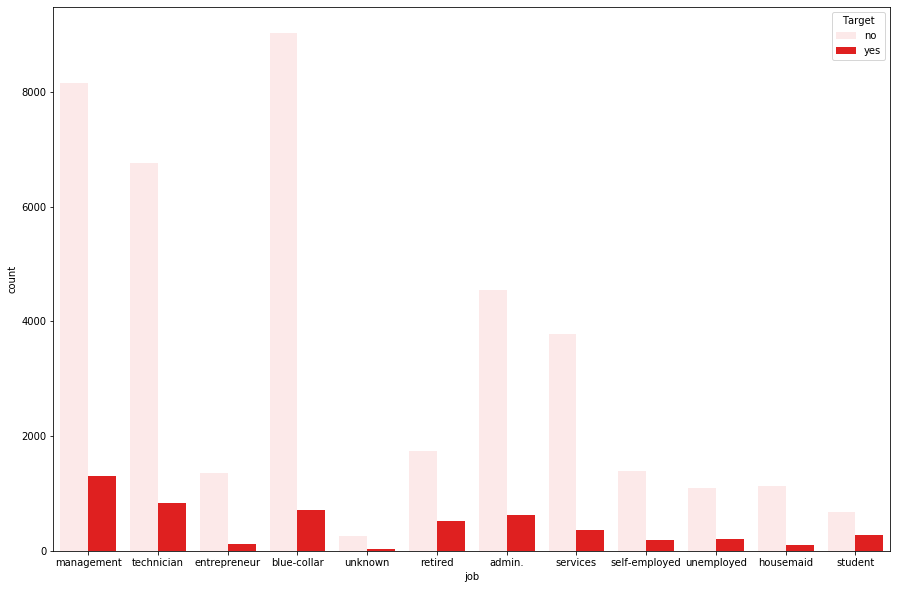

In [75]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x='job',hue='Target',color='red')

In [346]:
train = data.copy()
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [347]:
replacestruct = {
    "education" : {'primary':1,'secondary':2,'tertiary':3,'unknown':0},
    "default" : {'yes':1,'no':0},
    "housing" : {'yes':1,'no':0},
    "loan" : {'yes':1,'no':0},
    "Target" : {'yes':1,'no':0}
}

In [348]:
train = train.replace(replacestruct)
train.dtypes

age           int64
job          object
marital      object
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [349]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [350]:
# converting 'other' category of 'poutcome' as unknown
train[train['poutcome']=='other']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24062,42,admin.,single,2,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
24072,36,management,married,3,0,2415,1,0,telephone,22,oct,73,1,86,4,other,0
24086,44,blue-collar,married,2,0,1324,1,0,telephone,25,oct,119,1,89,2,other,0
24122,26,technician,single,3,0,172,0,1,telephone,4,nov,21,1,140,4,other,0
24136,34,management,married,3,0,1770,1,0,unknown,6,nov,26,1,101,11,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45153,64,retired,married,3,0,2059,0,1,cellular,9,nov,326,1,95,1,other,0
45165,33,technician,married,3,0,2976,1,0,cellular,9,nov,465,2,95,12,other,0
45170,19,student,single,1,0,245,0,0,telephone,10,nov,98,2,110,2,other,0
45199,34,blue-collar,single,2,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0


In [351]:
train['poutcome'] = train['poutcome'].replace({'other':'unknown'})
# replacing the 'other' type as 'unknown'

In [352]:
train['poutcome'].value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [353]:
train = train.drop('duration',axis=1)
# dropping the 'duration' column as it is not a parameter that should be used for predict

In [354]:

onehot = ["job",'marital','contact','poutcome','month']
train = pd.get_dummies(train, columns= onehot)

# converted categorical columns with one hot encoding
# converted the 'month','loan','default','target','education','housing' columns with label encoding

In [355]:
train.head()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,1,1,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,0,1506,1,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,0,1,0,0,5,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [356]:
train.shape

(45211, 44)

In [370]:
X = train.drop('Target',axis=1)
Y = train['Target']
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31647, 43)
(31647,)
(13564, 43)
(13564,)


In [371]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [372]:
lr.score(X_test,y_test)

0.8943526983190799

In [373]:
lr.score(X_train,y_train)

0.8910797231965115

 
                Confusion Matrix 


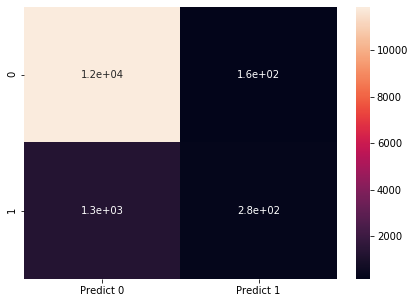

In [374]:
y_pred = lr.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [375]:
print("           Classification Report for Logistic Regression")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

# The accuracy for logistic regression is close to 90%
# The recall rate for '0' ('no') is 0.99, which is very high,
# however, the reacll rate for 1 ('yes') is just 18%
# Hence, this is not much of a reliable model

           Classification Report for Logistic Regression

              precision    recall  f1-score   support

           1       0.63      0.18      0.28      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [376]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8431141256266588

In [377]:
nb.score(X_train,y_train)

0.8427023098555946

 
                Confusion Matrix 


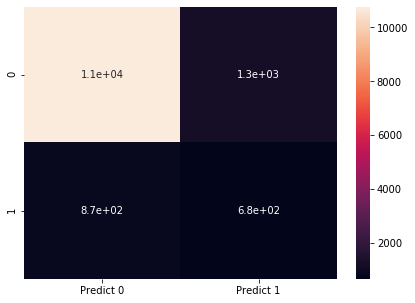

In [378]:
y_pred = nb.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [379]:
print("               Classification Report for Naive Bayes")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

# although the accuracy is better compared to logistic regression and the recall score for 1 is higher
# still, this cannot be a reliable model

               Classification Report for Naive Bayes

              precision    recall  f1-score   support

           1       0.35      0.44      0.39      1551
           0       0.92      0.90      0.91     12013

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [380]:
myList = list(range(1,100))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
ac_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

MSE = [x for x in ac_scores]

optimal_k = neighbors[MSE.index(max(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
print('And the score is ',max(MSE))

The optimal number of neighbors is 69
And the score is  0.8860218224712474


In [384]:
knn = KNeighborsClassifier(n_neighbors=69)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

 
                Confusion Matrix 


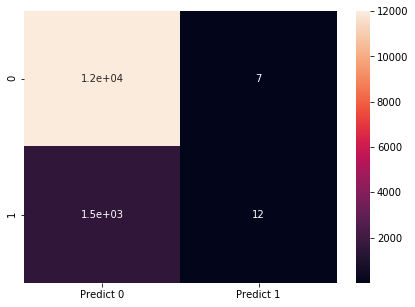

In [385]:
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [387]:
print("                   Classification Report for KNN")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

#Eventhough the accuracy is 88 % , The recall score for 1 ('yes') in KNN is extremely bad
# Hence KNN as well is not a better model

                   Classification Report for KNN

              precision    recall  f1-score   support

           1       0.63      0.01      0.02      1551
           0       0.89      1.00      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.76      0.50      0.48     13564
weighted avg       0.86      0.89      0.83     13564



In [388]:
clf = svm.SVC(gamma=0.5, C=3)    
clf.fit(X_train,y_train)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [389]:
clf.score(X_test,y_test)

0.885579475081097

 
                Confusion Matrix 


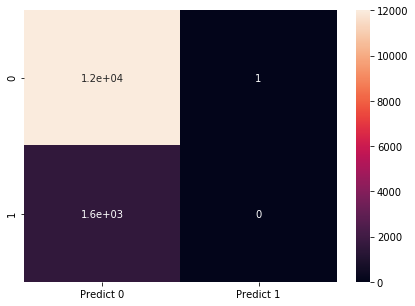

In [393]:
y_pred = clf.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [395]:
print("                   Classification Report for SVM")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

# SVM predicts everything as 'no', thereby the recall rate is zero for 1.
# This is definitely not a good model

                   Classification Report for SVM

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1551
           0       0.89      1.00      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564



In [405]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=15, min_samples_leaf=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

 
                Confusion Matrix 


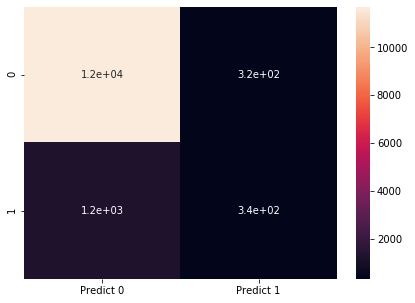

In [406]:
y_pred = dt.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [407]:
print("           Classification Report for Decision Tree")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

# Despite an accuracy of 89%, the recall rate for 1 is still very less. Hence this is not a dependent model

           Classification Report for Decision Tree

              precision    recall  f1-score   support

           1       0.51      0.22      0.31      1551
           0       0.91      0.97      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.71      0.60      0.62     13564
weighted avg       0.86      0.89      0.87     13564



In [408]:
# Visualizing the tree
import graphviz
train_char_label = ['no', 'yes']
dt_tree_File = open('dt_tree.dot','w')
dot_data = tree.export_graphviz(dt, out_file=dt_tree_File, feature_names = list(X_train), class_names = list(train_char_label))
dt_tree_File.close()
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.system('dot -Tpng dt_tree.dot -o dt_tree.png')
display(Image("dt_tree.png"))

# Since the tree is pretty large, hence the tree diagram is like that

In [420]:
bgcl = BaggingClassifier(base_estimator=lr,n_estimators=20,random_state=10)

bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_test,y_test))
print(bgcl.score(X_train,y_train))

0.8945001474491301
0.8914905046291908


In [421]:
y_pred = bgcl.predict(X_test)
print("            Classification Report for Bagging Classifier")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))
# Although the accuracy is close to 90%, the recall rate is only 18%
# Therefore, this is not a reliable model

            Classification Report for Bagging Classifier

              precision    recall  f1-score   support

           1       0.64      0.18      0.28      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [436]:
abcl = AdaBoostClassifier(n_estimators=100,learning_rate=0.3,random_state=4)
abcl = abcl.fit(X_train, y_train)
print(abcl.score(X_test,y_test))
print(abcl.score(X_train,y_train))

0.8943526983190799
0.8915221032009353


 
                Confusion Matrix 


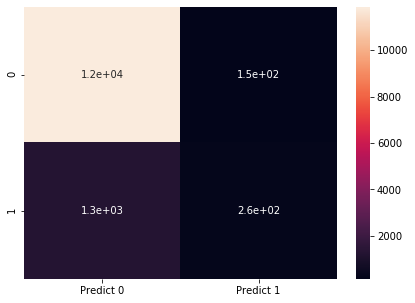

In [437]:
y_pred = abcl.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()


In [438]:

print("           Classification Report for Ada Boost Classifier")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))
# The accuracy is 89.16% , however the recall rate is still low

           Classification Report for Ada Boost Classifier

              precision    recall  f1-score   support

           1       0.64      0.17      0.27      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [487]:
gbcl = GradientBoostingClassifier(n_estimators = 70, learning_rate = 0.15, max_depth=5,random_state=9)
gbcl = gbcl.fit(X_train, y_train)

In [488]:
print(gbcl.score(X_test,y_test))
print(gbcl.score(X_train,y_train))

0.8939103509289296
0.9127879419850222


 
                Confusion Matrix 


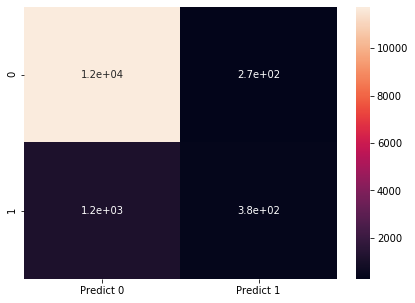

In [489]:
y_pred = gbcl.predict(X_test)
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]], columns = [i for i in ["Predict 0","Predict 1"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [490]:
print("           Classification Report for Gradient Boosting")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))
# The accuracy for gradient boosting is 88%, howwver the recall rate for 1 is just close to 25%

           Classification Report for Gradient Boosting

              precision    recall  f1-score   support

           1       0.59      0.25      0.35      1551
           0       0.91      0.98      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.65     13564
weighted avg       0.87      0.89      0.87     13564



In [491]:
rfcl = RandomForestClassifier(random_state=8,max_depth=12)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_test,y_test))
print(rfcl.score(X_train,y_train))

0.8967856089649071
0.9121875691218757


In [492]:
y_pred = rfcl.predict(X_test)
print("           Classification Report for Random Forest")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

           Classification Report for Random Forest

              precision    recall  f1-score   support

           1       0.68      0.18      0.29      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



In [ ]:
# models prepared for the given data 
# firstly i would like to present an important factor that the data is very imbalanced. 
# Thus, due to this imbalance between 'yes' and 'no' in the target column (Target result 'no' covers almost 90% of data)
# the prediction mostly ended up with a biased result towards 'no'

# Model perfomance:
    
# The logistic regression mode, KNN, Naive Bayes model and SVM all have an overall accuracy around 85-90%
# However, their recall rate for 'yes' is very very less except for naive bayes, which 44% of recall
# but their precision rate was very less for all the models. But the same model, perform very well in case of predicting 'no'
# that is because the dataset is highly imbalanced(biased towards 'no')
# I would also like to highlight the fact that SVM Model predicted almost all of its points as 'no'

# KNN, Logistic Regression have good precision, but very poor recall
# Naive bayes has 44% recall and precision of 35%

# Ensemble model perfomance: 

# Models: Bagging, Ada boost, Gradient boost, and Random Forest

#     The overall accuracy of all the models were high compared to the individual models.
#     The overall precision rate also had a considerable increase in their percentage compared to the individual models
#     However, The recall rate seems to be very low for all of the ensemble models for predicitng 'yes'
    
# My comments:

#     From a banks point of view,it is important that a customer who might accept the subscription for term deposit should'nt be missed
#     But unfortunately, all of the models seem to perform bad interms of predicting 'if a customer will take a loan'
#     but are good in predicting if a customer will 'not take loan'
#     This problem is due to the fact that there is a huge imbalance between the target variables, which in turn affects 
#     the overall perfomance of the model.
    